In [25]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/charge_surf_2disp/py_files')
from create_in import create_in
from out_reader import out_reader
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

In [26]:
N_brush1 = 320
N_brush2 = 160
S_namics = 200
alpha = 0.5
Cs = 0.001

surf_val_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
chi = 0.5
chi_surf = -0.3

In [27]:
profiles1, profiles2 = {}, {}

for val in surf_val_values:
    file_name_pro = create_in(
    template_surf_charge = '/home/tpopova/prj/PB_SCF/charge_surf_2disp/scf_templates/2_disp_surf.in',
    
    #название параметра
    range_param = 'val',
    min_val = 0.1,
    max_val = 0.1,
    
    Cs = Cs,
    chi = chi,
    chi_surf = chi_surf,
    
    N_layers = N_brush1,
    N_brush1 = N_brush1,
    N_brush2 = N_brush2,
    
    S_total = S_namics,
    alpha = alpha,
    
    surf_val = val
    ) 

    # парсим профили
    psi, phi_brush1, phi_brush2, phi_end_brush1, phi_end_brush2 = out_reader(file_names = file_name_pro)
    
    coord1 = np.arange(N_brush1)
    
    profiles1[val] = (coord1, phi_end_brush1)
    profiles2[val] = (coord1, phi_end_brush2)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.551516e+00 |g| = 7.391061e+00 alpha = 1.000000e+00 
hessian scaling: 1.27254
it =  1  E = 2.292727e+00 |g| = 6.564590e+00 alpha = 1.135299e-01 
it =  2  E = 2.811910e+00 |g| = 7.190795e+00 alpha = 7.767169e-02 
it =  3  E = 8.648152e+00 |g| = 7.552596e+00 alpha = 9.348296e-03 
it =  4  E = 7.696546e+00 |g| = 7.486499e+00 alpha = 1.078783e-02 
it =  5  E = 1.425752e+01 |g| = 7.688592e+00 alpha = 2.991212e-03 
it =  6  E = 9.363358e+00 |g| = 7.285017e+00 alpha = 6.151800e-03 
it =  7  E = 1.019914e+01 |g| = 7.395210e+00 alpha = 4.925685e-03 
it =  8  E = 6.549440e+00 |g| = 7.161031e+00 alpha = 1.084311e-02 
it =  9  E = 5.970020e+00 |g| = 7.162009e+00 alpha = 1.228309e-02 
it =  10  E = 7.076223e+00 |g| = 7.054083e+00

/tmp/ipykernel_2204986/1703790423.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


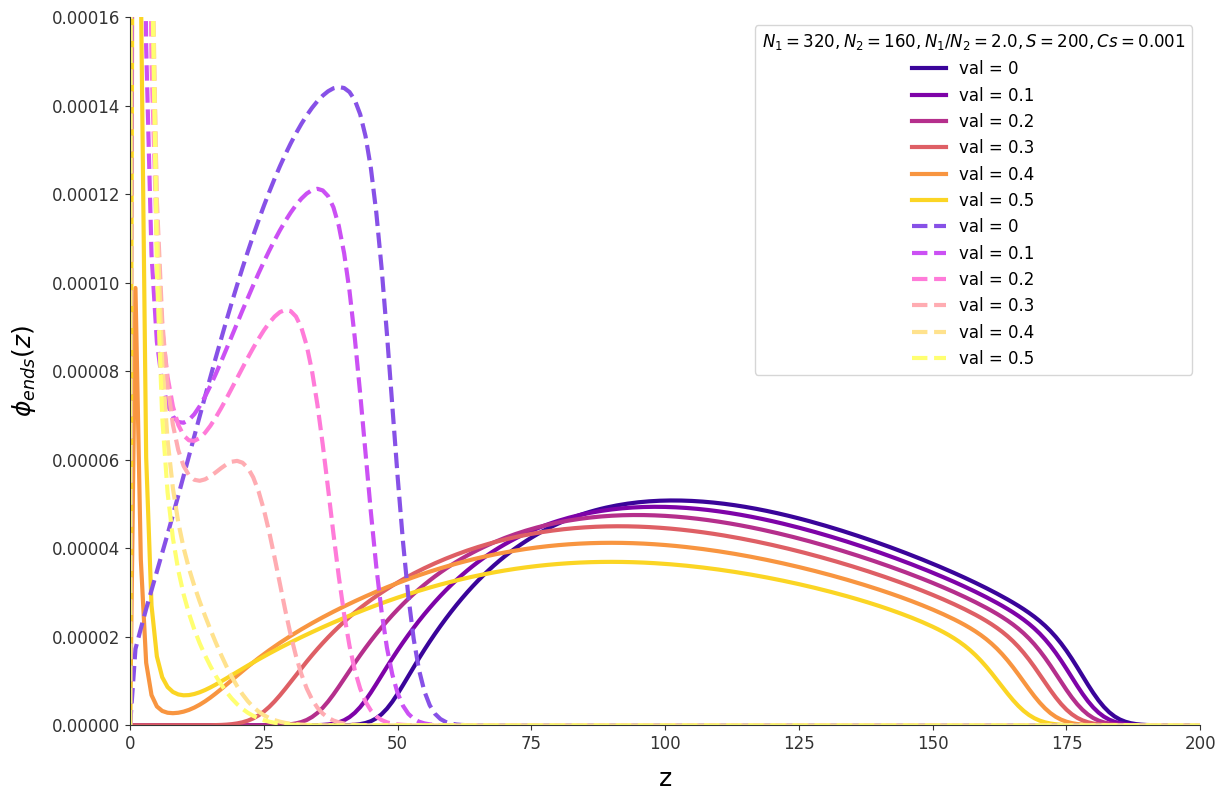

In [33]:
# Построение графиков
plt.figure(figsize=(12, 8))
color_map = get_cmap("plasma")

for i, (val, (coord1, phi_brush1)) in enumerate(profiles1.items()):
    base_color = color_map((i + 0.5) / len(surf_val_values))  # базовый цвет
    solid_color = base_color  # цвет для сплошной линии
    
    plt.plot(coord1, phi_brush1, label=f"val = {val}", linewidth=3, color=solid_color, linestyle="-")

for i, (val, (coord1, phi_brush2)) in enumerate(profiles2.items()):
    base_color = color_map((i + 0.5) / len(surf_val_values))  # базовый цвет
    dashed_color = tuple(min(c + 0.3, 1.0) for c in base_color[:3]) + (base_color[3],)  # осветляем цвет

    plt.plot(coord1, phi_brush2, label=f"val = {val}", linewidth=3, color=dashed_color, linestyle="--")

# Настройка визуализации
plt.xlabel("z", fontsize=18, labelpad=10)
plt.ylabel("$\\phi_{ends}(z)$", fontsize=18, labelpad=10)
plt.legend(fontsize=12, title=f"$N_1 = {N_brush1}, N_2 = {N_brush2}, N_1/N_2 = {round(N_brush1/N_brush2, 1)}, S = {S_namics}, Cs = {Cs}$", title_fontsize=12, loc="upper right")
plt.tight_layout()
plt.ylim(0, 0.00016)
plt.xlim(0, 200)

# Добавляем фон и рамку
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#333333")
plt.gca().spines["bottom"].set_color("#333333")
plt.gca().tick_params(axis='both', which='major', labelsize=12, colors="#333333")

# Показ графика
# plt.savefig('end_dist_var_val_disp_N_2.0.pdf', dpi=300, bbox_inches='tight')
plt.show()
